In [135]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('/content/sample_data/creditcard.csv')

In [137]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [139]:
#Check for missing values in each column
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [140]:
#Distribution of Legit Trxn and Fraud Trxn
df['Class'].value_counts()

,count
Class,
0.0,13897
1.0,56


0---> Valid Transaction

1---> Fraud Transaction

This is a highly unbalanced dataset. It contains almost 99.8% of Legit/Authentic Transactions and only 0.172% of Fraud Transactions.

In [141]:
fraud = df[df.Class == 1]
legit = df[df.Class == 0]

In [142]:
legit.Amount.describe()

,Amount
count,13897.000000
mean,63.773909
std,177.164503
min,0.000000
25%,5.770000
50%,15.900000
75%,52.370000
max,7712.430000


In [143]:
fraud.Amount.describe()

,Amount
count,56.000000
mean,90.815893
std,310.308450
min,0.000000
25%,1.000000
50%,1.000000
75%,1.025000
max,1809.680000


In [144]:
#Comparing both the values
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,10111.481255,-0.217093,0.266252,0.887227,0.276789,-0.107510,0.136745,-0.131462,-0.020385,1.005460,...,0.020758,-0.068686,-0.158230,-0.034834,0.013065,0.117928,0.034349,0.009565,0.002329,63.773909
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


UNDERSAMPLING

Building a sample dataset containig similar distribution of Legit Trxn and Fraud Trxn

(Since,we have 492 fraud trxn so we need to randomly pick 492 leagit trxn to create a new dataset with even distribution)

In [145]:
legit_sample = legit.sample(n=492)

In [146]:
df2 = pd.concat([legit_sample,fraud], axis = 0)

In [147]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 11159 to 12369
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    548 non-null    int64  
 1   V1      548 non-null    float64
 2   V2      548 non-null    float64
 3   V3      548 non-null    float64
 4   V4      548 non-null    float64
 5   V5      548 non-null    float64
 6   V6      548 non-null    float64
 7   V7      548 non-null    float64
 8   V8      548 non-null    float64
 9   V9      548 non-null    float64
 10  V10     548 non-null    float64
 11  V11     548 non-null    float64
 12  V12     548 non-null    float64
 13  V13     548 non-null    float64
 14  V14     548 non-null    float64
 15  V15     548 non-null    float64
 16  V16     548 non-null    float64
 17  V17     548 non-null    float64
 18  V18     548 non-null    float64
 19  V19     548 non-null    float64
 20  V20     548 non-null    float64
 21  V21     548 non-null    float64
 22  V

In [148]:
df2['Class'].value_counts()

,count
Class,
0.0,492
1.0,56


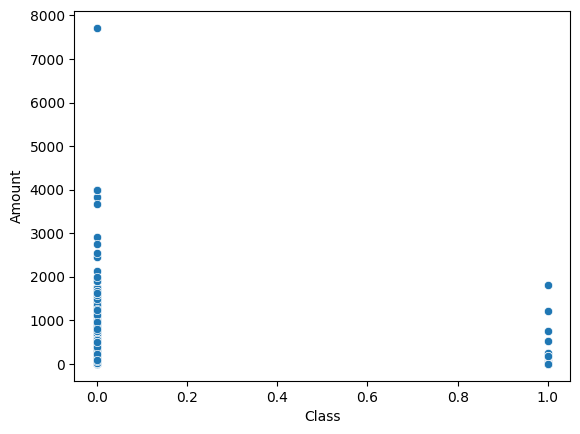

In [149]:
sns.scatterplot(df, x='Class', y = 'Amount')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

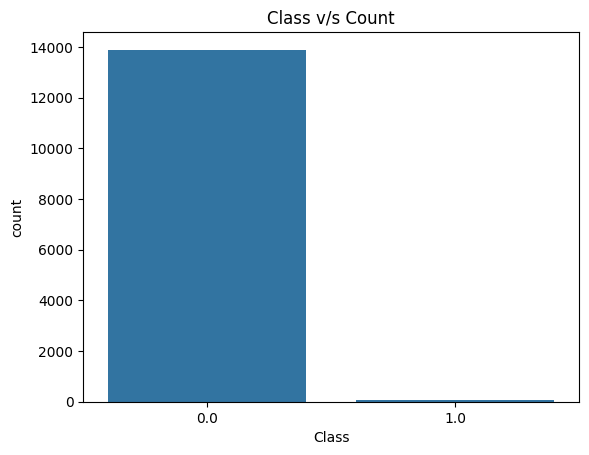

In [150]:
sns.countplot(df, x = 'Class')
plt.title('Class v/s Count')
plt.show

In [151]:
X = df2.drop(columns = ['Class'])
Y = df2['Class']

In [152]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.4, random_state = 32, shuffle = True)

In [154]:
 model = LR(class_weight='balanced', max_iter=1000)

In [155]:
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [156]:
Y_pred = model.predict(X_test)

In [157]:
precision = precision_score(Y_test, Y_pred)
precision

0.972972972972973

In [158]:
recall = recall_score(Y_test, Y_pred)
recall

0.9

In [159]:
f1 = f1_score(Y_test, Y_pred)
recall

0.9

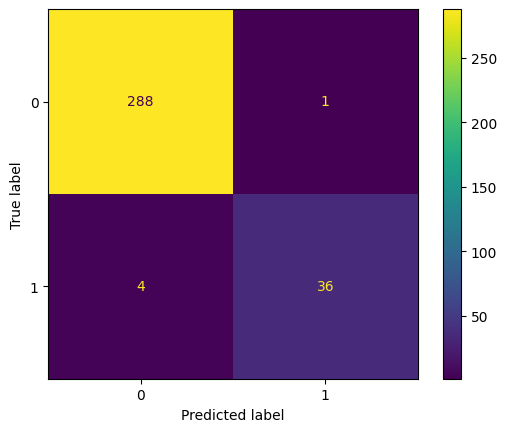

In [160]:
CM= confusion_matrix(Y_test, Y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=CM)
matrix.plot()